In [1]:
import pandas as pd

In [2]:
perguntas = pd.read_excel('dados/Formulario Avaliacao de Risco - Respostas Anonimizadas 2.xlsx', sheet_name='Formularios Avaliacao Risco')
perguntas.head()

,Formulario,Pergunta,Resposta,Pontos,Complemento
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,0,NaN
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,1,NaN
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,1,NaN
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,1,NaN
4,1,Você necessitou de atendimento médico e/ou int...,Não,0,NaN


In [3]:
perguntas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650779 entries, 0 to 650778
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Formulario   650779 non-null  int64 
 1   Pergunta     650779 non-null  object
 2   Resposta     650779 non-null  object
 3   Pontos       650779 non-null  int64 
 4   Complemento  21767 non-null   object
dtypes: int64(2), object(3)
memory usage: 24.8+ MB


In [4]:
perguntas.drop(['Complemento', 'Pontos'], axis=1, inplace=True)

In [5]:
perguntas_entrevistador = ['Durante o atendimento, a vítima demonstra percepção de risco sobre sua situação? A percepção é de existência ou inexistência do risco? (por exemplo, ela diz que o agressor pode matá-la, ou ela justifica o comportamento do agressor ou naturaliza o comportamento violento?). Anote a percepção e explique.',
'Existem outras informações relevantes com relação ao contexto ou situação da vítima e que possam indicar risco de novas agressões? (Por exemplo, a vítima tem novo(a) companheiro(a) ou tomou decisões que anunciam um rompimento definitivo com o agressor (pretende mudar de casa, bairro, cidade).',
'Tem sinais de esgotamento emocional?',  'Está tomando medicação controlada?',  'Necessita de acompanhamento psicológico e/ou psiquiátrico?','Existe o risco de a vítima tentar suicídio ou existem informações de que tenha tentado se matar?', 'A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?']
print(len(perguntas_entrevistador))

7


Removo as perguntas respondidas pelos entrevistadores

Minha justificativa é pela lógica aplicada pelo formulário, já que essas perguntas só podem ser respondidas caso o entrevistador não seja um professional da polícia sem perfil de equipe técnica, ou seja, existem formulários que não vão ter essas perguntas, e que nesse caso a falta de informação não seria por conta da vítima e sim por conta do entrevistador

In [6]:
perguntas_vitima = [pergunta for pergunta in perguntas.Pergunta.unique() if pergunta not in perguntas_entrevistador]

In [7]:
perguntas['pergunta_resposta'] = perguntas.Pergunta + '_' + perguntas.Resposta
perguntas.head()

,Formulario,Pergunta,Resposta,pergunta_resposta
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,O(A) agressor(a) já ameaçou você ou algum fami...
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,O(A) agressor(a) já praticou alguma(s) destas ...
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,O(A) agressor(a) já praticou alguma(s) destas ...
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,O(A) agressor(a) já praticou alguma(s) destas ...
4,1,Você necessitou de atendimento médico e/ou int...,Não,Você necessitou de atendimento médico e/ou int...


In [8]:
df_perguntas_vitima = perguntas[~perguntas.Pergunta.isin(perguntas_entrevistador)]

In [9]:
df_pivot = df_perguntas_vitima.pivot(index="Formulario", columns="pergunta_resposta", values="Resposta").reset_index()

In [10]:
df_pivot.head()

pergunta_resposta,Formulario,Algum de seus filhos é pessoa com deficiência?_Não,Algum de seus filhos é pessoa com deficiência?_Não se aplica,Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu,Algum de seus filhos é pessoa com deficiência?_Não tenho filhos,Algum de seus filhos é pessoa com deficiência?_Sim,As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não,As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não se aplica,As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Não sei/Não respondeu,As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?_Sim,...,"Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?_Sim",Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não se aplica,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Não sei/Não respondeu,Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?_Sim,Você tem filhos?_Não,Você tem filhos?_Não se aplica,Você tem filhos?_Não sei/Não respondeu,"Você tem filhos?_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, de outro relacionamento"
0,1,NaN,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN
1,2,NaN,NaN,NaN,NaN,Sim,NaN,NaN,NaN,Sim,...,NaN,Não,NaN,NaN,NaN,Não,NaN,NaN,NaN,NaN
2,3,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,...,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"
3,4,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sim,...,NaN,Não,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, com o(a) agressor(a)",NaN
4,5,Não,NaN,NaN,NaN,NaN,Não,NaN,NaN,NaN,...,Sim,Não,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Sim, de outro relacionamento"


In [11]:
df_dummies = pd.get_dummies(df_pivot, dtype=int, dummy_na=True)

In [12]:
df_dummies

,Formulario,Algum de seus filhos é pessoa com deficiência?_Não_Não,Algum de seus filhos é pessoa com deficiência?_Não_nan,Algum de seus filhos é pessoa com deficiência?_Não se aplica_Não se aplica,Algum de seus filhos é pessoa com deficiência?_Não se aplica_nan,Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu_Não sei/Não respondeu,Algum de seus filhos é pessoa com deficiência?_Não sei/Não respondeu_nan,Algum de seus filhos é pessoa com deficiência?_Não tenho filhos_Não tenho filhos,Algum de seus filhos é pessoa com deficiência?_Não tenho filhos_nan,Algum de seus filhos é pessoa com deficiência?_Sim_Sim,...,Você tem filhos?_Não_Não,Você tem filhos?_Não_nan,Você tem filhos?_Não se aplica_Não se aplica,Você tem filhos?_Não se aplica_nan,Você tem filhos?_Não sei/Não respondeu_Não sei/Não respondeu,Você tem filhos?_Não sei/Não respondeu_nan,"Você tem filhos?_Sim, com o(a) agressor(a)_Sim, com o(a) agressor(a)","Você tem filhos?_Sim, com o(a) agressor(a)_nan","Você tem filhos?_Sim, de outro relacionamento_Sim, de outro relacionamento","Você tem filhos?_Sim, de outro relacionamento_nan"
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
1,2,0,1,0,1,0,1,0,1,1,...,1,0,0,1,0,1,0,1,0,1
2,3,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
3,4,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
4,5,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16506,16590,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
16507,16591,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,0,1,1,0
16508,16592,1,0,0,1,0,1,0,1,0,...,0,1,0,1,0,1,1,0,0,1
16509,16593,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,1,1,0,0,1


# Clustering com kmeans usando PCA

In [13]:
from sklearn.decomposition import PCA

df_pca = df_dummies.drop('Formulario',axis=1)

pca = PCA()

X_pca = pca.fit_transform(df_pca)

In [14]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% de variância
print(f"Número de componentes para 95% de variância: {n_components}")

Número de componentes para 95% de variância: 77


In [15]:
pca = PCA(n_components=n_components)

X_pca = pca.fit_transform(df_pca)

In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-Means
sse = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)  # Inertia = SSE
    

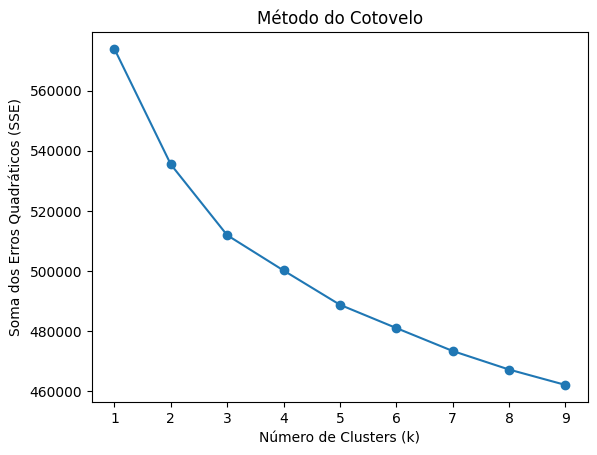

In [57]:
# Plot do Método do Cotovelo
plt.plot(k_values, sse, marker='o')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.title("Método do Cotovelo")
plt.show()


In [58]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_pca)

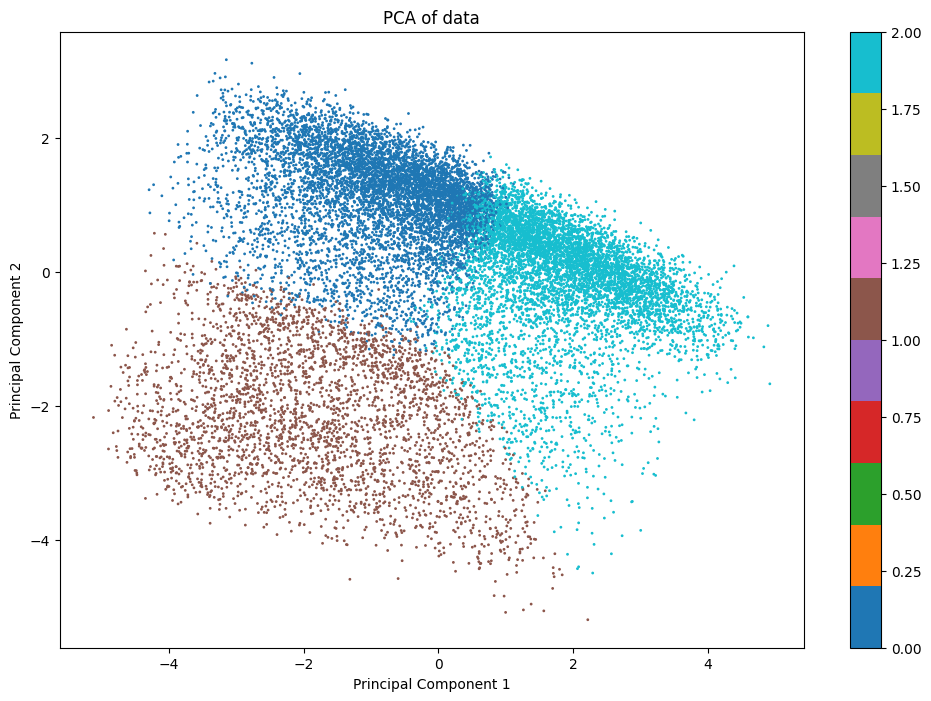

In [59]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters.astype(int), cmap='tab10', s=1)
plt.colorbar(scatter)
plt.title('PCA of data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [60]:
indexes_perguntas = [f'qa_{n}' for n in range(n_components)]

df_kpca = pd.DataFrame(X_pca, columns=indexes_perguntas)

In [61]:
df_kpca['Formulario'] = df_dummies.Formulario

In [62]:
pontuacoes = pd.read_excel('dados/Formulario Avaliacao de Risco - Respostas Anonimizadas 2.xlsx', sheet_name='Pontos por Formulario')
pontuacoes.head()

,Formulario,Pontuação Total
0,1,16
1,2,11
2,3,14
3,4,14
4,5,18


In [63]:
df_merged = pd.merge(df_kpca, pontuacoes, on='Formulario', how='inner')
df_merged.head()

,qa_0,qa_1,qa_2,qa_3,qa_4,qa_5,qa_6,qa_7,qa_8,qa_9,...,qa_69,qa_70,qa_71,qa_72,qa_73,qa_74,qa_75,qa_76,Formulario,Pontuação Total
0,-0.222250,1.132626,-0.919340,-0.039814,0.869161,-0.579462,0.027868,-1.502710,1.405424,0.420924,...,-0.235182,-0.156095,0.037414,0.116130,-0.251596,0.188349,-0.000564,-0.257168,1,16
1,-1.167160,0.146397,-1.900241,1.110827,-0.271690,-1.098713,-0.683391,0.865467,0.939061,-0.239681,...,-0.781844,-0.280805,-0.400740,-0.453500,0.787189,0.299664,-1.009928,0.175925,2,11
2,-0.483700,0.681029,-0.491194,2.142845,-0.379312,1.500302,-0.855160,-0.643083,0.287161,-1.205524,...,-0.200127,-0.053944,0.060047,0.055370,-0.167659,-0.145972,-0.021702,-0.055030,3,14
3,-0.171070,1.087151,-1.083898,1.082242,-0.615085,-1.037482,-0.494665,-1.165432,0.927291,0.046857,...,-0.420979,0.352336,0.069719,-0.026642,-0.051440,0.133735,0.141358,0.234010,4,14
4,0.297127,0.477376,1.141624,1.810317,-0.938868,1.161780,-1.361702,-0.438920,-0.468019,-0.924272,...,-0.002731,0.115753,0.029470,-0.035158,-0.131128,0.019730,0.004467,-0.048762,5,18


In [64]:
df_merged['cluster'] = clusters

In [65]:
medias_por_cluster = df_merged.groupby('cluster')['Pontuação Total'].mean().reset_index()
medias_por_cluster['cores'] = ['r','g','b']

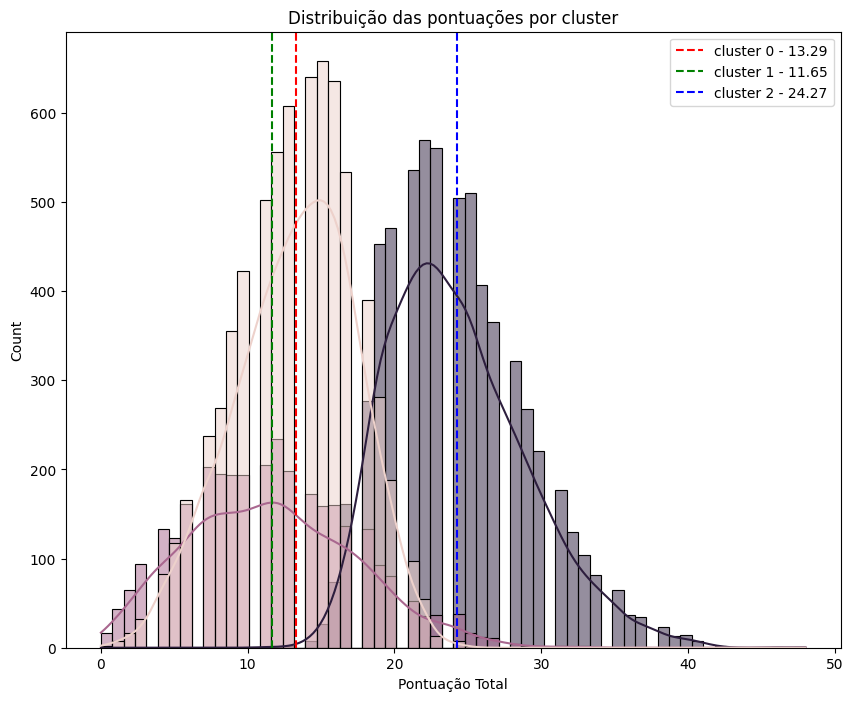

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.histplot(df_merged, x='Pontuação Total', hue='cluster', kde=True)

for i, row in medias_por_cluster.iterrows():
  plt.axvline(x=row["Pontuação Total"], color=row['cores'], linestyle='--', label=f'cluster {row["cluster"]} - {round(row["Pontuação Total"],2)}')

plt.title('Distribuição das pontuações por cluster')
plt.legend()

plt.show()

In [27]:
# df_merged.to_csv('dados/dataset_tratado_ml.csv', index=False)

## Avaliação do kmeans

In [33]:
kmeans.inertia_

511884.6370774418

In [35]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, kmeans.labels_) # Próximo de 1 é melhor, mas é sensível diferentes formas
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.060224074495434904


In [55]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X_pca, kmeans.labels_)

calinski_harabasz = calinski_harabasz_score(X_pca, kmeans.labels_)

print(f"silhouette_score: {silhouette_avg}")
print(f"davies_bouldin_score: {davies_bouldin}")
print(f"calinski_harabasz_score: {calinski_harabasz}")


silhouette_score: 0.06022781944585948
davies_bouldin_score: 3.5054175931692733
calinski_harabasz_score: 1000.0987039780017


In [42]:
silhouette_score: 0.06026889310180134
davies_bouldin_score: 3.5051474173284487
calinski_harabasz_score: 1000.099348605015

77

# Carregar modelo do pca

In [28]:
# import joblib

# joblib.dump(pca, "models/pca_model.pkl")

In [29]:
# df_merged.cluster.value_counts()